Net(
  (fc1): Linear(in_features=2, out_features=1, bias=False)
)
[Parameter containing:
tensor([[ 1., -1.]], requires_grad=True)]
Epoch 0 - loss: 81.0
Epoch 1 - loss: 80.3532943725586
Epoch 2 - loss: 8.785722732543945
Epoch 3 - loss: 356.5799255371094
Epoch 4 - loss: 8.435876846313477
Epoch 5 - loss: 8.419013023376465
Epoch 6 - loss: 349.53875732421875
Epoch 7 - loss: 75.43144989013672
Epoch 8 - loss: 7.981720447540283
Epoch 9 - loss: 7.96576452255249
Epoch 10 - loss: 340.7213439941406
Epoch 11 - loss: 7.640636920928955
Epoch 12 - loss: 7.625364303588867
Epoch 13 - loss: 7.610121250152588
Epoch 14 - loss: 333.70733642578125
Epoch 15 - loss: 327.72760009765625
Epoch 16 - loss: 68.78291320800781
Epoch 17 - loss: 6.917880058288574
Epoch 18 - loss: 68.14686584472656
Epoch 19 - loss: 6.817560195922852
Epoch 20 - loss: 317.741455078125
Epoch 21 - loss: 6.5278143882751465
Epoch 22 - loss: 65.68791198730469
Epoch 23 - loss: 65.16344451904297
Epoch 24 - loss: 64.64319610595703
Epoch 25 - loss:

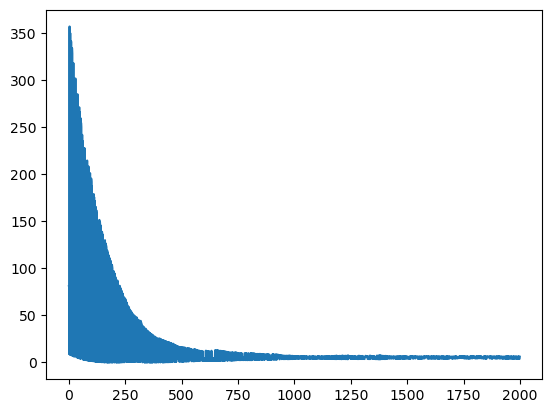

In [43]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
import matplotlib.pyplot as plt

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2,1,bias=False)
    def forward(self, x):
        x = self.fc1(x)
        return x

net = Net()
print(net)


net.fc1.weight = torch.nn.Parameter(torch.tensor([[1., -1.]], requires_grad=True))

print(list(net.parameters()))

#input = torch.randn(1,2)
#out = net(input)


criterion = nn.MSELoss()
#def criterion(out, label):
#    return ((label - out)**2).mean()


optimizer = optim.SGD(net.parameters(), lr=5e-5)
#optimizer = optim.Adam(net.parameters(), lr=0.005)


data = torch.tensor([[1.,3.], [2.,6.], [3.,9.]], dtype=torch.float)
target = torch.tensor([[1.],[5.],[13.]], dtype=torch.float)

hist = []
flag = "SGD"
epoch = 2000

if flag == "batch":
    ############## Batch GD based update ##############       
    for epoch in range(epoch):   
        optimizer.zero_grad()
        outputs = net(data)
        loss = criterion(outputs, target)
        loss.backward()
        hist.append(loss.detach())
        optimizer.step()
        print("Epoch {} - loss: {}".format(epoch, loss))
    ####################################################

if flag == "SGD":
    # SGD update
    for epoch in range(epoch):
        idx = torch.randint(0, len(data), (1,))
        optimizer.zero_grad()
        outputs = net(data[idx])
        loss = criterion(outputs, target[idx])
        loss.backward()
        hist.append(loss.detach())
        optimizer.step()
        print("Epoch {} - loss: {}".format(epoch, loss))

### Test the trained network ###
for i, current_data in enumerate(data):
    out = net(current_data)  
    print("when x = {}, y = {}".format(current_data, out)) 
    # labels are [1, 5, 13]
plt.plot(hist, label = "training curve")

In [27]:
net.fc1.weight

Parameter containing:
tensor([[ 1.2602, -0.2193]], requires_grad=True)